<a href="https://colab.research.google.com/github/Aman91109/Aman91109/blob/main/Sentiment_Analysis_On_Amazon_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis On Amazon Product Reviews

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
from sklearn.utils import shuffle

load and read the data sets

In [ ]:
data = pd.read_csv('1429_1.csv', on_bad_lines='skip')

<ipython-input-9-30b7ecdcc31a>:1: DtypeWarning: Columns (1,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('1429_1.csv', on_bad_lines='skip')


In [ ]:
data.shape

(33426, 21)

In [ ]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,TRUE,NaN,0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33426 entries, 0 to 33425
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    33426 non-null  object 
 1   name                  26666 non-null  object 
 2   asins                 33423 non-null  object 
 3   brand                 33426 non-null  object 
 4   categories            33425 non-null  object 
 5   keys                  33426 non-null  object 
 6   manufacturer          33425 non-null  object 
 7   reviews.date          33386 non-null  object 
 8   reviews.dateAdded     22805 non-null  object 
 9   reviews.dateSeen      33426 non-null  object 
 10  reviews.didPurchase   2 non-null      object 
 11  reviews.doRecommend   32830 non-null  object 
 12  reviews.id            3 non-null      object 
 13  reviews.numHelpful    32895 non-null  object 
 14  reviews.rating        33390 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
data.nunique()

,0
id,42
name,50
asins,42
brand,8
categories,43
keys,45
manufacturer,4
reviews.date,1080
reviews.dateAdded,1772
reviews.dateSeen,3913


In [ ]:
data['reviews.doRecommend'].value_counts()

,count
reviews.doRecommend,
TRUE,30904
FALSE,1302
True,587
False,36
"http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=1277,http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=1245,http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=1308,http://reviews.bestbuy.com/3545/5025800/reviews.htm?format=embedded&page=1341",1


In [ ]:
data['reviews.rating'].value_counts()

,count
reviews.rating,
5.0,22985
4.0,8186
3.0,1445
1.0,394
2.0,380


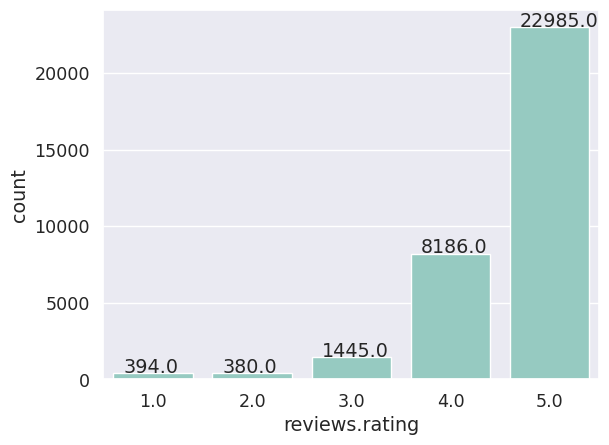

In [ ]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating',data=data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

# The classes are quite imbalanced. Reviews with low/negative ratings are less.

Let's combine other datasets given.

In [ ]:
data1 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
data2 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [ ]:
data1['reviews.rating'].value_counts()

,count
reviews.rating,
5,3478
4,1208
3,197
1,63
2,54


In [ ]:
data2['reviews.rating'].value_counts()

,count
reviews.rating,
5,19897
4,5648
3,1206
1,965
2,616


Concat all data

In [ ]:
data=pd.concat([data,data1,data2])

In [ ]:
data.shape

(66758, 27)

In [ ]:
data=data.reset_index()

In [ ]:
data.drop(columns=['index'],inplace=True)

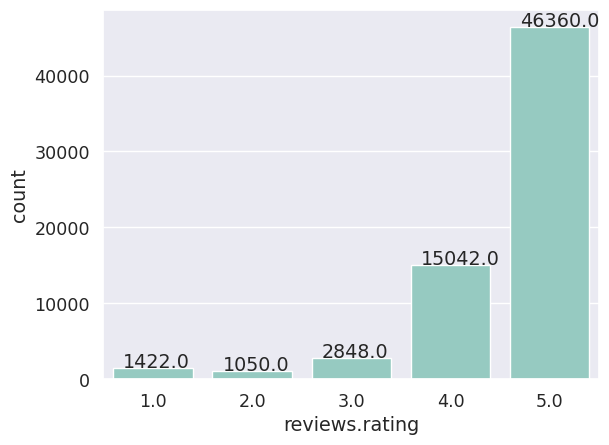

In [ ]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating',data=data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

checking null values

In [ ]:
data.isnull().sum()

,0
id,0
name,6760
asins,3
brand,0
categories,1
keys,0
manufacturer,1
reviews.date,40
reviews.dateAdded,42901
reviews.dateSeen,0


# Creating a column 'Sentiment'.

If the ratings are greater than '3', the review can be under the 'Positive' category. If it is equal to '3' than it's 'Neutral' and if it's less than '3', it's 'Negative'.

In [ ]:
def sentiment(rating):
    """
    This function return sentiment value based on the ratings.
    """
    if rating == 3.0:
        value = 'Neutral'
    elif rating == 4.0 or rating == 5.0:
        value = 'Positive'
    elif rating == 1.0 or rating == 2.0:
        value = 'Negative'
    else:
        value = -1
    return value

# Use the correct column name 'reviews.rating'
data['Sentiment'] = data.apply(lambda row: sentiment(row['reviews.rating']), axis=1)

In [ ]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs,Sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN,Positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN,Positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,DaveZ,NaN,NaN,NaN,NaN,NaN,NaN,Positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,Shacks,NaN,NaN,NaN,NaN,NaN,NaN,Positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,explore42,NaN,NaN,NaN,NaN,NaN,NaN,Positive


In [ ]:
data.Sentiment.value_counts()

,count
Sentiment,
Positive,61402
Neutral,2848
Negative,2472
-1,36


In [ ]:
data['reviews.rating'].value_counts()

,count
reviews.rating,
5.0,46360
4.0,15042
3.0,2848
1.0,1422
2.0,1050


# Thanks for today

In [ ]:
print ('Thanks for today')

Thanks for today
